In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import scipy.optimize as op
import scipy as spy
import random
import matplotlib.cm as cm
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D 

<h4> Find Closest Centroids  </h4>

In [10]:
path="H:/assignments/machine_learning/mex7/machine-learning-ex7/machine-learning-ex7/ex7/ex7data2.mat"
data=sp.loadmat(path)
X=data['X']
X.shape

(300, 2)

In [11]:
def findClosestCentroids(XX, initial_centroids):
    
    idxm=np.zeros((XX.shape[0],1))
    
    for i in range(XX.shape[0]):
       idxm[i]=np.argmin(np.sum(np.square(XX[i]-initial_centroids),axis=1))
    return idxm

In [12]:
def plotShow(X,centroids,idx=None):
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0],X[:,1],c=idx,cmap=plt.cm.prism)
    plt.scatter(centroids[:,0],centroids[:,1],marker='+',c='black')
    plt.show()
    plt.close()
    

In [13]:
plt.close('all')
K=3
initial_centroids=np.array(np.mat('3 3; 6 2;8 5'))
idx=findClosestCentroids(X,initial_centroids)
idx[:3]

array([[ 0.],
       [ 2.],
       [ 1.]])

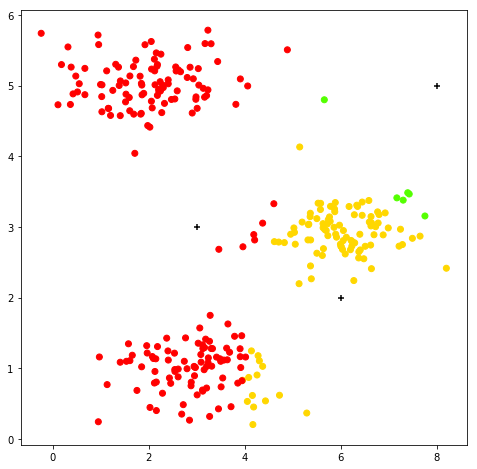

In [14]:
plotShow(X,initial_centroids,idx)

In [15]:
def computeCentroids(X, idx, K):
    centroids=np.zeros((K,X.shape[1]))
    for i in range(K):
        centroids[i]=np.mean(X[idx[:,0]==i],axis=0)
    return  centroids   

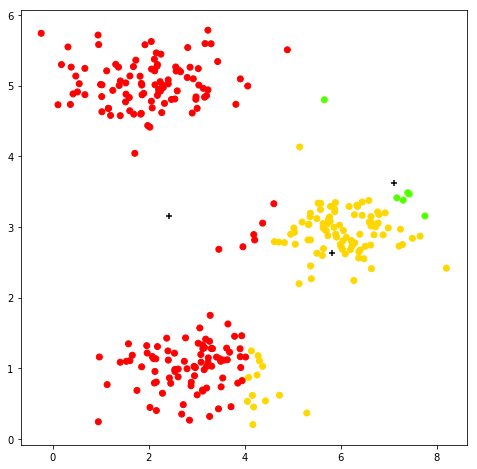

In [16]:
centroids=computeCentroids(X, idx, K)
plotShow(X,centroids,idx)

### Running K means

In [17]:
plt.close('all')
def run_k_means(XX,centroids,K,max_iter):
    ocentroids=centroids
    for i in range(0,max_iter):
        idxm=findClosestCentroids(XX,ocentroids)
#         print(idxm.shape)
        ocentroids=computeCentroids(XX, idxm, K)
#         print(centroids.shape)
    return (idxm,ocentroids)   

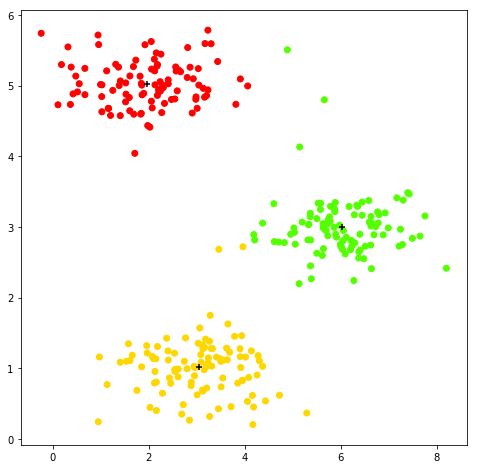

In [18]:
(idx,centroids)=run_k_means(X,centroids,3,max_iter=10)
plotShow(X,centroids,idx)
plt.close('all')

### Image Compression with k-means

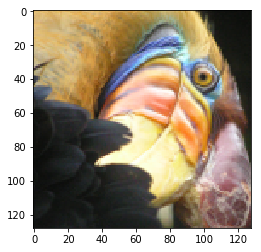

(128, 128, 3)

In [19]:
path="H:/assignments/machine_learning/mex7/machine-learning-ex7/machine-learning-ex7/ex7/bird_small.png"
img = plt.imread(path)
img_shape = img.shape
plt.imshow(img)
plt.show()
plt.close("all")
img.shape

In [20]:
def kMeansInitCentroids(X, k):
    centroids=np.zeros((k,X.shape[1]))
    for i in range(k):
        centroids[i]=X[i]
    return centroids    

In [21]:
A=img/255
XX = A.reshape(img_shape[0]*img_shape[1],img_shape[2])
k=16
max_iters = 10
initial_centroids=kMeansInitCentroids(XX, k)
# print(initial_centroids.shape)
idxm,opt_centroids= run_k_means(XX,initial_centroids,k,max_iter=50)
idxm.shape,initial_centroids.shape,opt_centroids.shape
# idxm[100:500]

((16384, 1), (16, 3), (16, 3))

In [22]:
# Now I have 16 centroids, each representing a color.
# Let's assign an index to each pixel in the original image dictating
# which of the 16 colors it should be
idxs = findClosestCentroids(XX, opt_centroids)


In [23]:
final_centroids = opt_centroids
# Now loop through the original image and form a new image
# that only has 16 colors in it
final_image = np.zeros((idxs.shape[0],3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

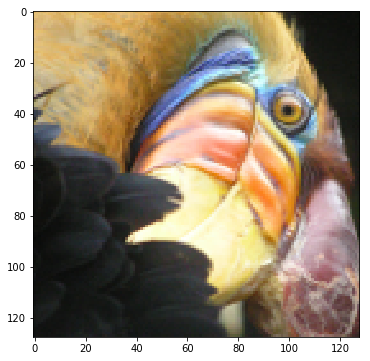

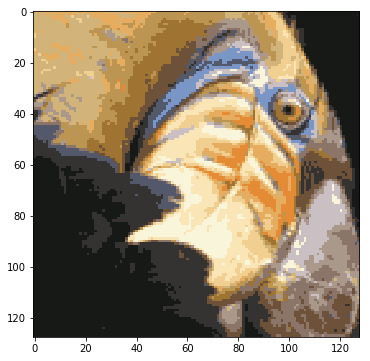

In [24]:
# Reshape the original image and the new, final image and draw them
# To see what the "compressed" image looks like
plt.figure(figsize=(6,6))
plt.imshow(XX.reshape(128,128,3)*255)
plt.show()
plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(final_image.reshape(128,128,3)*255)
plt.show()
plt.close('all')

### Visualizing the data

In [25]:
path="H:/assignments/machine_learning/mex7/machine-learning-ex7/machine-learning-ex7/ex7/ex7data1.mat"
data=sp.loadmat(path)
X=data['X']

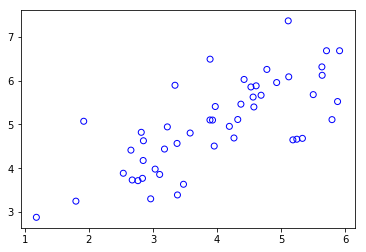

In [26]:
plt.scatter(X[:,0],X[:,1],facecolors='none', edgecolors='b')
plt.show()
plt.close()

### Implementing mean normalize

In [27]:
def feature_normalize(X):
    mean=np.mean(X,axis=0)
    stds  = np.std(X-mean,axis=0)
    X_norm=(X-mean)/stds
    return mean,stds,X_norm

### Implementing PCA 

In [28]:
from scipy import linalg
def pca(X_norm):
    # Compute the covariance matrix
    cov_matrix = X_norm.T.dot(X_norm)/X_norm.shape[0]
    # Run single value decomposition to get the U principal component matrix
    U, S, V = linalg.svd(cov_matrix, full_matrices = True, compute_uv = True)
    return U, S, V

In [29]:
mean,stds,X_norm=feature_normalize(X)
U, S, V=pca(X_norm)
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([ 1.73553038,  0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

Top principal component is  [-0.70710678 -0.70710678]


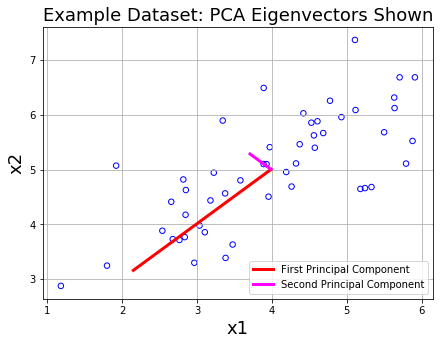

In [30]:
# "...output the top principal component (eigen- vector) found, 
# and you should expect to see an output of about [-0.707 -0.707]"
print('Top principal component is ',U[:,0])

#Quick plot, now including the principal component
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)
#To draw the principal component, you draw them starting
#at the mean of the data
plt.plot([mean[0], mean[0] + 1.5*S[0]*U[0,0]], 
         [mean[1], mean[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([mean[0], mean[0] + 1.5*S[1]*U[1,0]], 
         [mean[1], mean[1] + 1.5*S[1]*U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)
plt.show()
plt.close('all')

<h3>Dimensionality Reduction with PCA</h3>


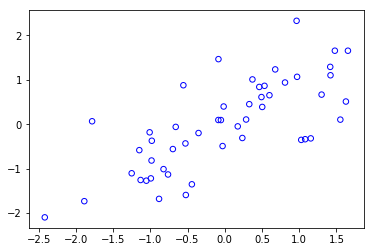

In [31]:
plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', edgecolors='b')
plt.show()
plt.close('all')

In [32]:
def project_data(X_norm,U,K): 
    U_reduce = U[:,:K]
    z = X_norm.dot(U_reduce)
    return z

    

In [33]:
z=project_data(X_norm,U,1)
z[0][0]

1.496312608457852

### Reconstructing Data

In [34]:
def recover_data(z, U, K):
    Ureduced = U[:,:K]
    Xapprox = z.dot(Ureduced.T)  
    return Xapprox

In [35]:
X_rec = recover_data(z,U,1)
print('Recovered approximation of the first example is ',X_rec[0])

Recovered approximation of the first example is  [-1.05805279 -1.05805279]


<h3>Visualizing Projections</h3>

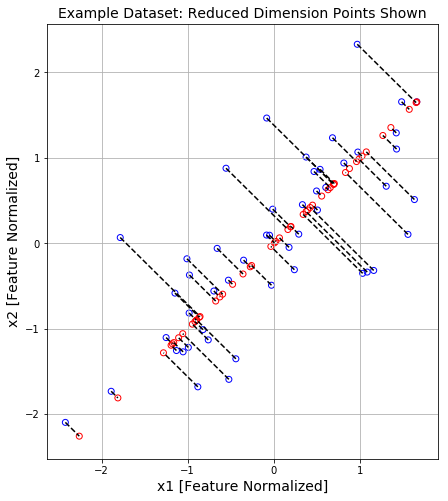

In [36]:
X_norm.shape,X_rec.shape
plt.figure(figsize=(7,8))
plt.scatter(X_norm[:,0],X_norm[:,1],facecolors='none', edgecolors='b')
plt.scatter(X_rec[:,0],X_rec[:,1],facecolors='none', edgecolors='r')
plt.grid(True)
for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)    
plt.show()
plt.close('all')

<h3>Face Dataset</h3>

In [55]:
def display_data(X,indices,nrows,ncols):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 32, 32
    indices_to_display = range(indices) 
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = X[idx].reshape(width,height).T
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = spy.misc.toimage( big_picture )
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap = cm.Greys_r)
    plt.show()
    plt.close('all')

(5000, 1024)


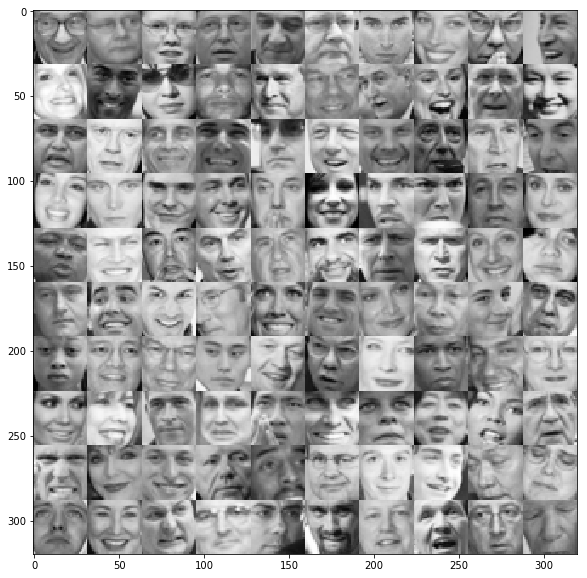

In [57]:
path="H:/assignments/machine_learning/mex7/machine-learning-ex7/machine-learning-ex7/ex7/ex7faces.mat"
data=sp.loadmat(path)
X=data['X']
print(X.shape)
display_data(X,100,10,10)

(5000, 1024)


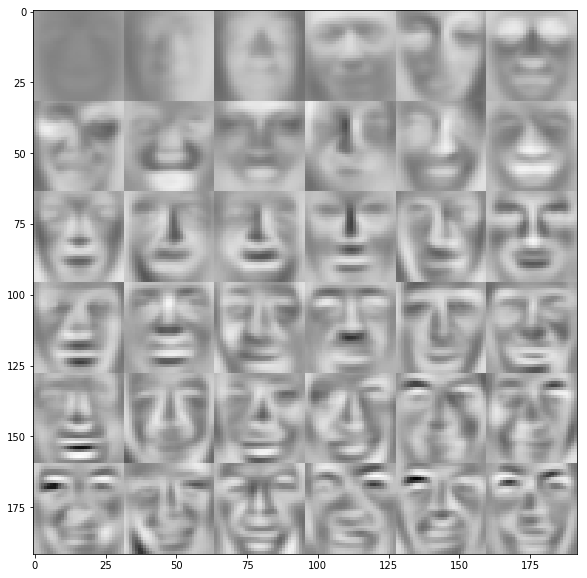

In [70]:
#Run PCA and visualize the eigenvectors which are in this case eigenfaces
#We display the first 36 eigenfaces.
print(X.shape)
mean,stds,X_norm=feature_normalize(X)
U, S, V=pca(X_norm)

display_data(U[:,:36].T,36,6,6)

#Project images to the eigen space using the top k eigenvectors 
K = 100;
Z = project_data(X_norm, U, K);
Z.shape,X_norm.shape

### Visualization of Faces after PCA Dimension Reduction


Original faces


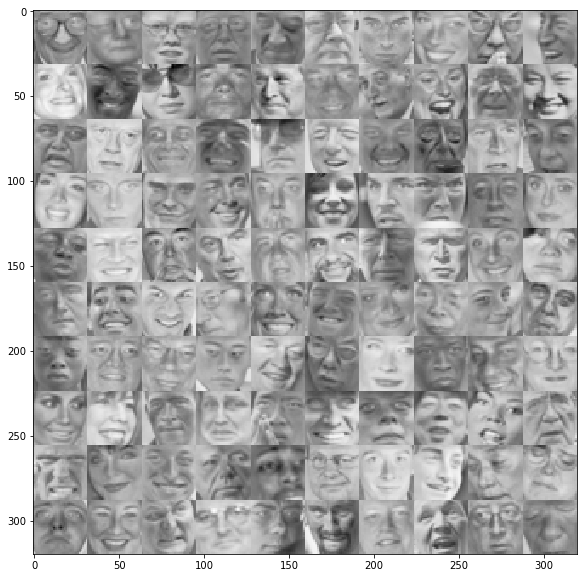

In [78]:
K = 100;
X_rec  = recover_data(Z, U, K);
print('Original faces')
display_data(X_norm[0:100,:],100,10,10);

Recovered Faces


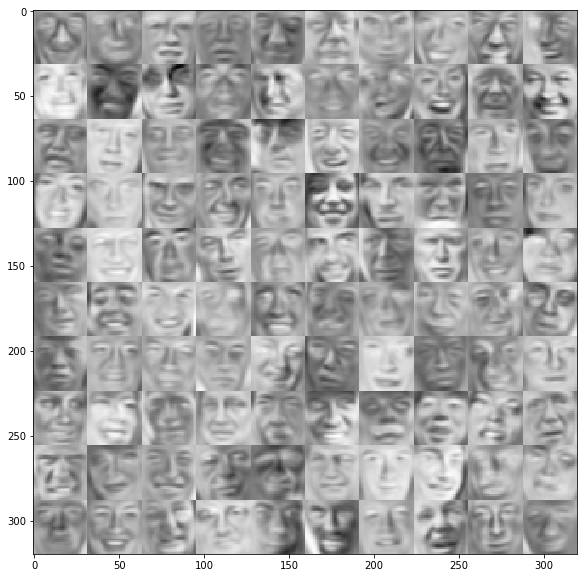

In [81]:
print('Recovered Faces')
display_data(X_rec[0:100,:],100,10,10)

###  PCA for Visualization


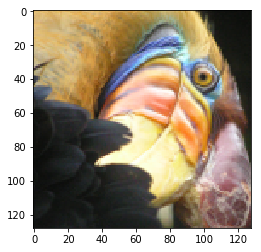

(128, 128, 3)

In [82]:
path="H:/assignments/machine_learning/mex7/machine-learning-ex7/machine-learning-ex7/ex7/bird_small.png"
img = plt.imread(path)
img_shape = img.shape
plt.imshow(img)
plt.show()
plt.close("all")
img.shape

In [83]:
A=img/255
XX = A.reshape(img_shape[0]*img_shape[1],img_shape[2])
k=16
max_iters = 10
initial_centroids=kMeansInitCentroids(XX, k)
# print(initial_centroids.shape)
idxm,opt_centroids= run_k_means(XX,initial_centroids,k,max_iter=50)
idxm.shape,initial_centroids.shape,opt_centroids.shape

((16384, 1), (16, 3), (16, 3))

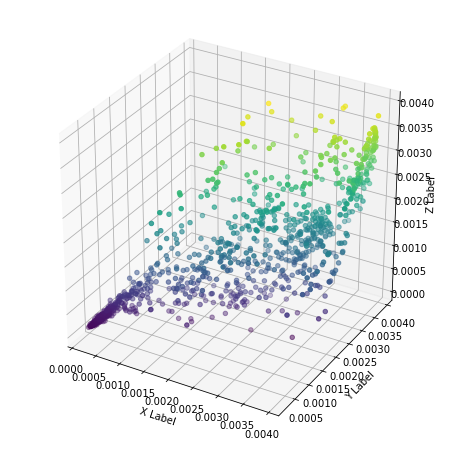

In [132]:
sel = random.sample(range(XX.shape[0]), 1000)
X_sel=np.take(XX,sel,axis=0)
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
n = 100
# For each set of style and range settings, plot n random points in the box
ax.scatter(X_sel[:,0],X_sel[:,1],X_sel[:,2],c=X_sel[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
plt.close('all')

### Projectting and plotting data in 2D

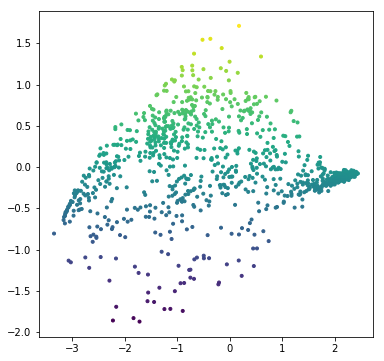

In [133]:
mean,stds,X_norm=feature_normalize(XX)
U, S, V=pca(X_norm)
Z = project_data(X_norm, U, 2);
X_sel=np.take(Z,sel,axis=0)
# Plot in 2D
fig = plt.figure(figsize=(6,6))
plt.scatter(X_sel[:,0],X_sel[:,1],c=X_sel[:,1],marker='.')
plt.show()
# plotDataPoints(Z(sel, :), idx(sel), K);
plt.close('all')